<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day4_predict_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

데이터 준비하기

In [ ]:
# 맨 윗줄에 컬럼 정보가 없기 때문에 header=None 사용
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wine.csv', header=None)
print(data.head())

     0     1     2    3      4     5     6       7     8     9    10  11  12
0   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1
1   7.8  0.88  0.00  2.6  0.098  25.0  67.0  0.9968  3.20  0.68  9.8   5   1
2   7.8  0.76  0.04  2.3  0.092  15.0  54.0  0.9970  3.26  0.65  9.8   5   1
3  11.2  0.28  0.56  1.9  0.075  17.0  60.0  0.9980  3.16  0.58  9.8   6   1
4   7.4  0.70  0.00  1.9  0.076  11.0  34.0  0.9978  3.51  0.56  9.4   5   1


데이터셋 생성하기

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:12].values # values 값만 가져오려고 사용
y = data.iloc[:, 12].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 0/1로 되어 있는 타켓 값이면 shape이 안 나옴
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4547, 12)
(1950, 12)
(4547,)
(1950,)


모델 구성하기

In [ ]:
np.random.seed(7) # 똑같은 데이터셋을 얻기 위해 random.seed 사용

model = Sequential()
model.add(Dense(30, input_shape=(12,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


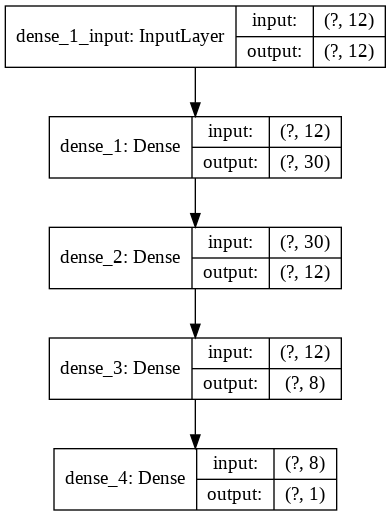

In [ ]:
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습과정 설정하기

In [ ]:
# 이진 분류라서 바이너리 크로스엔트로피 사용
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

모델 학습시키기

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=500, 
                    batch_size=150,
                    validation_data = (X_test, y_test))

Train on 4547 samples, validate on 1950 samples
Epoch 1/500
4547/4547 [==============================] - 0s 83us/step - loss: 0.3994 - accuracy: 0.8271 - val_loss: 0.2923 - val_accuracy: 0.9103
Epoch 2/500
4547/4547 [==============================] - 0s 14us/step - loss: 0.2631 - accuracy: 0.9239 - val_loss: 0.2409 - val_accuracy: 0.9297
Epoch 3/500
4547/4547 [==============================] - 0s 16us/step - loss: 0.2285 - accuracy: 0.9281 - val_loss: 0.2188 - val_accuracy: 0.9287
Epoch 4/500
4547/4547 [==============================] - 0s 11us/step - loss: 0.2135 - accuracy: 0.9281 - val_loss: 0.2054 - val_accuracy: 0.9313
Epoch 5/500
4547/4547 [==============================] - 0s 13us/step - loss: 0.2083 - accuracy: 0.9279 - val_loss: 0.2024 - val_accuracy: 0.9323
Epoch 6/500
4547/4547 [==============================] - 0s 12us/step - loss: 0.2041 - accuracy: 0.9296 - val_loss: 0.2002 - val_accuracy: 0.9333
Epoch 7/500
4547/4547 [==============================] - 0s 11us/step - loss

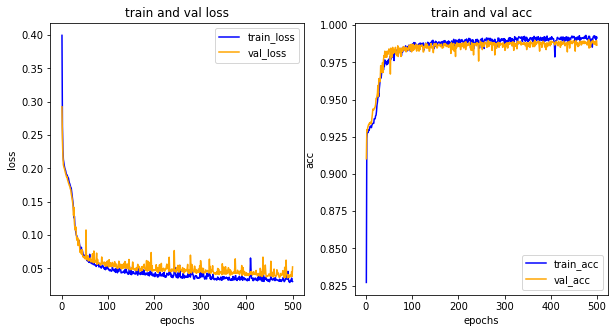

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

1950/1950 [==============================] - 0s 21us/step
accuracy: 99.23%
